### Portfolio Examination for the Data Science Course MADS-MMS
### Name: Ugwuabonyi Emmanuel
#### Title: Finding the measurement and utilization of impact indicators on the Web using Facebook Live sellers Datasets from UCI Respository


### Importing the libraries

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


### Solution to Exercise 1

#### Data acquisition and Initial Data Analysis.<br>
The data is about live selling feature on the Facebook platform.<br>
The dataset was obtained from the UCI Machine Learning repository<br>
https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand.

### Loading the Dataset

In [2]:
#The dataset(facebook_live_thailand) is loaded with pandas library
 
Dataset_A = pd.read_csv("facebook_live_thailand.csv")

In [3]:
#dataframe.head(n) to test if the object contains the right data
Dataset_A.head(4)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN


#### 1.1
The rows represent the information about the time live information of sale posted on Facebook and engagements in the data.<br> The rows contains the resulting engagement metrics comprising type(text, deferred, video, photo),shares, comments, and emoji<br> reactions within which to distinguish traditional “likes” from recently introduced emoji reactions, that are “love”, “wow”, “haha”, “sad” and “angry”

In [21]:
#To get more information about the dataset including the index dtype and columns, non-null values and memory usage.

Dataset_A.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

#### 1.2
The dataset contains 7050 rows/instances with rangeindex 0 to 7049

#### 1.3
The dataset contains 16 columns including column1 to column4 with null values

#### 1.4
To calculate the standard deviation of num_likes. Pandas dataframe.std() function return sample standard deviation over requested axis. 


In [6]:
Dataset_A["num_likes"].std()

449.4723570561426

### Exercise 2

#### 2.1 
Features of the dataset that do not suggest themselves as features for clustering analysis


In [4]:
Dataset_A.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


From the dataset, we can see that 7 features do not suggest themselves to be used for clustering analysis.<br>
The features include status_id, status_type, status_published, column1, column2, column3 and column4 contain null values(NaN).<p> 
status_id: This is a unique identifier for each of the instances<br>
status_type contains 4 different categorical data and cannot be used for clustering<br>
status_published contains the datetime datatype and cannot be used for clustering analysis<br>
column1 to column4: are redundant features containing null values(NaN)


#### 2.2
Creating Dataset_B from Dataset_A by restricting it to the following features:
num_reactions,num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas

In [8]:
Dataset_B = Dataset_A.loc[:,['num_reactions','num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas']]
Dataset_B.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas
0,529,512,262,432,92,3,1
1,150,0,0,150,0,0,0
2,227,236,57,204,21,1,1
3,111,0,0,111,0,0,0
4,213,0,0,204,9,0,0


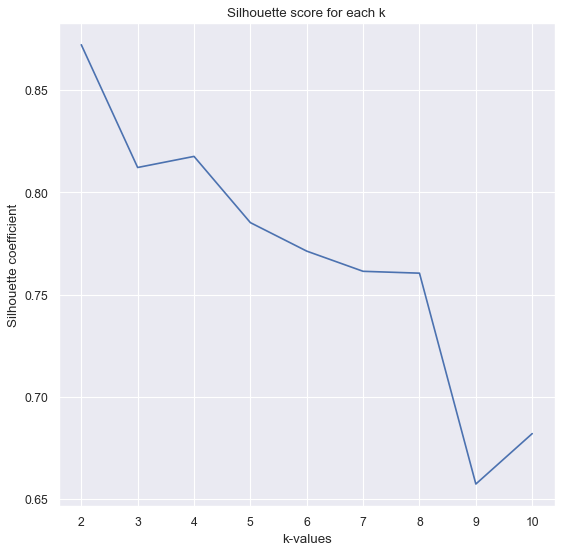

In [13]:
#A function that creates a Silhouette plot with different choices of k from 2,3,...,10 using euclidean as distance metric

silhouette = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    cluster_assignments = kmeans.fit_predict(Dataset_B)
    silhouette_coeff = silhouette_score(Dataset_B, kmeans.labels_, metric = 'euclidean')
    silhouette.append(silhouette_coeff)
    

plt.figure(figsize = (8, 8), dpi = 80)
plt.title("Silhouette score for each k")
plt.xlabel("k-values")
plt.ylabel("Silhouette coefficient")
plt.savefig("images/Silhouette score for each k.pdf")
plt.plot(range(2,11), silhouette)
plt.show()    

Interprete the above diagram

From the diagram above, k=2 yield the best results, with the highest silhouette coefficient. 
k = 3 and k = 4 are fairly good


# 2.3


Creating a silhouette plot with k = 2 having the highest silhouette coefficint in the previous experiment

In [21]:
#converting Dataset_B to a numpy array
df_Bval = Dataset_B.values

In [28]:
def plot_silhouette(kmeans, df_Bval, title, filename):
    colors=['red', 'blue', 'yellow']
    plt.figure(figsize=(8, 8))
    X_sub=df_Bval
    y_pred = kmeans.fit_predict(X_sub)
    visualizer = SilhouetteVisualizer(kmeans, colors=colors, is_fitted=True)
    visualizer.fit(X_sub) # Fit the data to the visualizer
    visualizer.finalize()
    plt.savefig(f'images/Silhouette score.pdf')
    print(f'Silhoutte score: {visualizer.silhouette_score_}')
    visualizer.show() # Finalize and render the figure

Silhoutte score: 0.8721940910132095


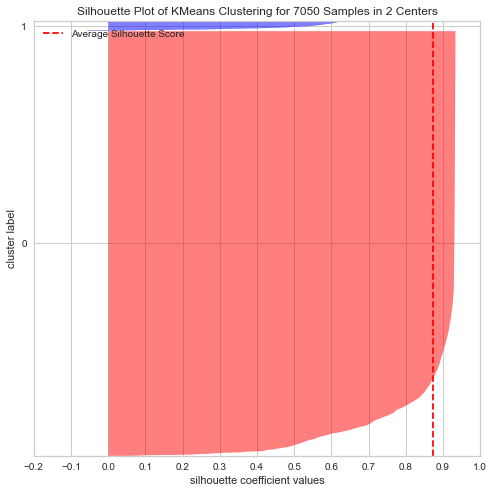

In [29]:
kmeans=KMeans(n_clusters=2, random_state=1)
plot_silhouette(kmeans, df_Bval, ' k=2', 'datasetB')

#### Intepretation of the above silhouette plot
The silhouette plot shows that the n_cluster value of 2 is a good pick for the given data 
due to the presence of clusters with silhouette scores close to +1

#### 2.4

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer

colors=['blue', 'cyan', 'dodgerblue']

def plot_clusters_with_centers(kmeans, df_B, index_x, index_y, title, filename):
    plt.figure(figsize=(8, 8))
    X_sub=df_B[:,[index_x, index_y]]
    y_pred = kmeans.fit_predict(X_sub)
    for i in range(0,len(np.unique(y_pred))):
        plt.scatter(X_sub[y_pred==i, 0], X_sub[y_pred==i, 1], c=colors[i], label=i)


    
    plt.scatter(
        kmeans.cluster_centers_[:, 0], 
        kmeans.cluster_centers_[:, 1],
        s=350, marker='*', c='crimson', edgecolor='black'
    )
    plt.savefig("images/ plot of data(2.4).pdf")


   

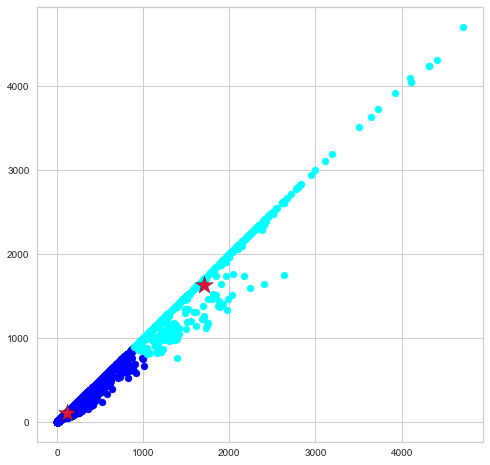

In [49]:
kmeans=KMeans(n_clusters=2, random_state=1)
plot_clusters_with_centers(kmeans, df_B, 0,3, ' k=2', 'datasetB')

Interpretation:
A centroid was formed but there is no clear separation between the clusters. This, the sample formed a linear cluster

### Exercise 3

#### 3.1

The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. 


#### 3.2

MinMax Scaler is better for variance comparison.

MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. It is the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).
This transformation is often used as an alternative to zero mean, unit variance scaling.




#### 3.3

X_std = (X - X.min(axis = 0)) / (X.max(axis = 0) - X.min(axis = 0))

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Dataset_C = scaler.fit_transform(df_B)

In [52]:
Dataset_C

array([[0.11231423, 0.02439257, 0.07651869, ..., 0.14003044, 0.01079137,
        0.00636943],
       [0.03184713, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04819533, 0.01124345, 0.0166472 , ..., 0.03196347, 0.00359712,
        0.00636943],
       ...,
       [0.00042463, 0.        , 0.        , ..., 0.00152207, 0.        ,
        0.        ],
       [0.07452229, 0.0005717 , 0.00642523, ..., 0.00304414, 0.        ,
        0.        ],
       [0.00360934, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
silhouette2 = [] # Assigning a secondary address so it does not add to the previous one in the
for k in range (2,11):
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit_predict(Dataset_C)
silhouette_coefficient = silhouette_score(Dataset_C, kmeans.labels_,metric='euclidean')
silhouette2.append(silhouette_coefficient)
plt.figure(figsize = (8, 8), dpi = 80)
plt.plot(range(2,11), silhouette2, color="green", label="Data_C")
plt.plot(range(2,11), silhouette, color="blue", label="Data_B")
plt.title("Silhouette score for each k")
plt.legend()
plt.xlabel("k : 2, 3,...,10.")
plt.ylabel("Silhouette coefficient")
#plt.savefig('Images/Silhouette score each k 3_3.png', bbox_inches='tight')
plt.savefig('Images/Silhouette score each k 3_3.pdf')
plt.show()

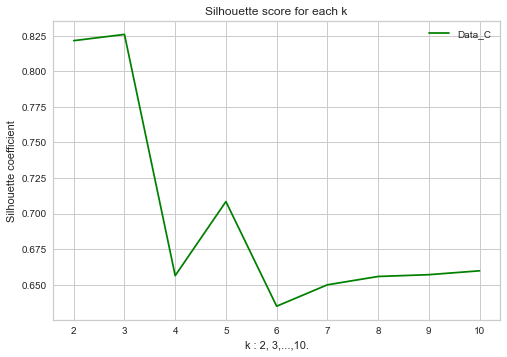

In [60]:
silhouette_C = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    cluster_assignments = kmeans.fit_predict(Dataset_C)
    silhouette_coeff = silhouette_score(Dataset_C, kmeans.labels_, metric = 'euclidean')
    silhouette_C.append(silhouette_coeff)
    #plt.figure(figsize = (8, 8), dpi = 80)
plt.plot(range(2,11), silhouette_C, color="green", label="Data_C")
plt.title("Silhouette score for each k")
plt.legend()
plt.xlabel("k : 2, 3,...,10.")
plt.ylabel("Silhouette coefficient")
#plt.savefig('Images/Silhouette score each k 3_3.png', bbox_inches='tight')
plt.savefig('Images/Silhouette score each k 3_3.pdf')


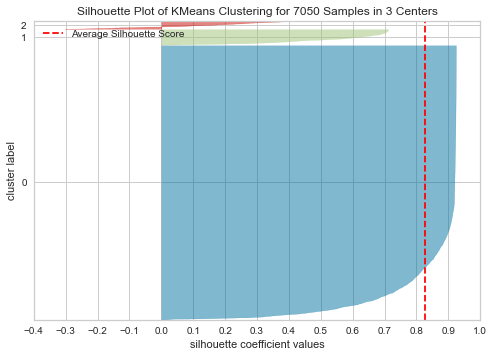

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7050 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [24]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(Dataset_C)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### 3.4

In [62]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.005)
Dataset_D = vt.fit_transform(Dataset_C)

In [63]:
Dataset_D

array([[0.11231423, 0.09171975],
       [0.03184713, 0.03184713],
       [0.04819533, 0.0433121 ],
       ...,
       [0.00042463, 0.00021231],
       [0.07452229, 0.07409766],
       [0.00360934, 0.00360934]])

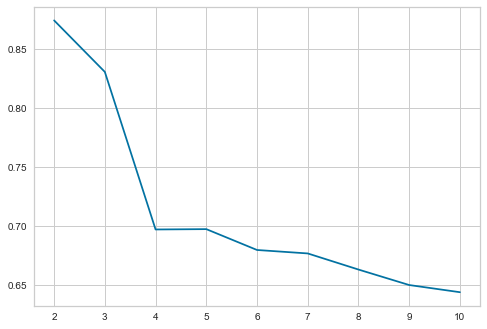

In [26]:
silhouette = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    cluster_assignments = kmeans.fit_predict(Dataset_D)
    silhouette_coeff = silhouette_score(Dataset_D, kmeans.labels_, metric = 'euclidean')
    silhouette.append(silhouette_coeff)
    
plt.plot(range(2,11), silhouette)

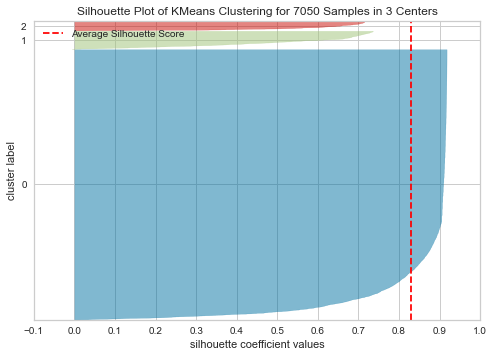

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7050 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(Dataset_D)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
#3.6

In [64]:
df_D=pd.DataFrame(Dataset_D, columns=['num_reactions', 'num_likes'])


In [88]:
# using k=2 and default values from sklearn
kmeans = KMeans(n_clusters=2, random_state=1, init='k-means++', max_iter=300, tol=0.0001)
# compute cluster centers and predict cluster index for each sample
Dataset_D_comp = kmeans.fit_predict(df_D, sample_weight=None)
Dataset_B_comp = kmeans.fit_predict(Dataset_B, sample_weight=None)
# add the distribution within the clusters of D and B to the full Dataset A
#Dataset_A['D_comp'] = Dataset_D_comp

#Dataset_B['B_comp'] = Dataset_B_comp

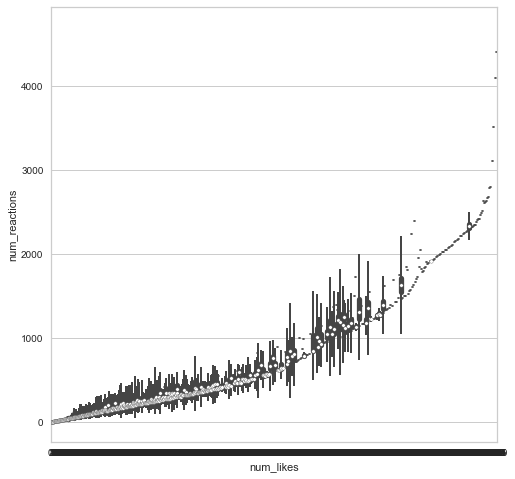

In [93]:
plt.figure(figsize=(8, 8))
violin_plot = sns.violinplot(x='num_likes', y='num_reactions', data=Dataset_B)
plt.savefig('images/Violinplot Dataset_D num_reactions.pdf')
plt.show()

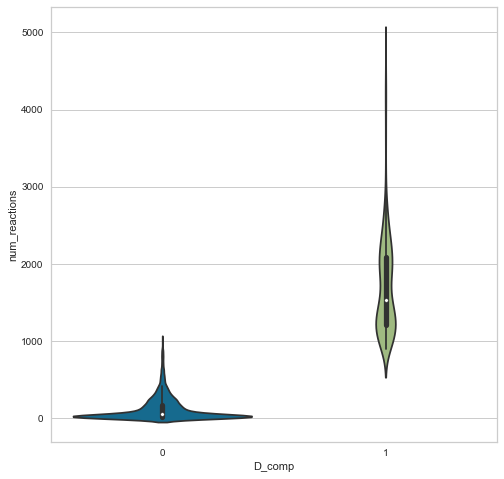

In [90]:
plt.figure(figsize=(8, 8))
violin_plot = sns.violinplot(x='D_comp', y='num_reactions', data=Dataset_A)
plt.savefig('images/Violinplot Dataset_D num_likes.pdf')
plt.show()

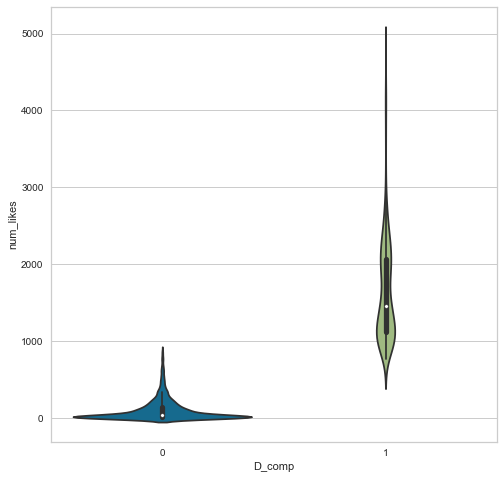

In [92]:
plt.figure(figsize=(8, 8))
violin_plot = sns.violinplot(x='D_comp', y='num_likes', data=Dataset_A)
plt.savefig('images/Violinplot Dataset_D num_likes.pdf')
plt.show()